In [3]:
import pandas as pd

df = pd.read_csv("hotel_bookings.csv", sep=',')

del df['agent']
del df['company']
del df['hotel']
del df['customer_type']
del df['arrival_date_year']
del df['arrival_date_week_number']
del df['arrival_date_day_of_month']
del df['reservation_status_date']
del df['reservation_status']
del df['adr']
del df['deposit_type']
del df['days_in_waiting_list']
del df['assigned_room_type']
del df['reserved_room_type']
del df['distribution_channel']
del df['country']
del df['meal']
del df['market_segment']

def changeMonth(month):
    if month == "January":
        month = 1
    if month == "February":
        month = 2
    if month == "March":
        month = 3
    if month == "April":
        month = 4
    if month == "May":
        month = 5
    if month == "June":
        month = 6
    if month == "July":
        month = 7
    if month == "August":
        month = 8
    if month == "September":
        month = 9
    if month == "October":
        month = 10
    if month == "November":
        month = 11
    if month == "December":
        month = 12
    return month
    

df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: changeMonth(x))




df2=df.dropna(axis=0)


df



,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,required_car_parking_spaces,total_of_special_requests
0,0,342,7,0,0,2,0.0,0,0,0,0,3,0,0
1,0,737,7,0,0,2,0.0,0,0,0,0,4,0,0
2,0,7,7,0,1,1,0.0,0,0,0,0,0,0,0
3,0,13,7,0,1,1,0.0,0,0,0,0,0,0,0
4,0,14,7,0,2,2,0.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,8,2,5,2,0.0,0,0,0,0,0,0,0
119386,0,102,8,2,5,3,0.0,0,0,0,0,0,0,2
119387,0,34,8,2,5,2,0.0,0,0,0,0,0,0,4
119388,0,109,8,2,5,2,0.0,0,0,0,0,0,0,0


In [1]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

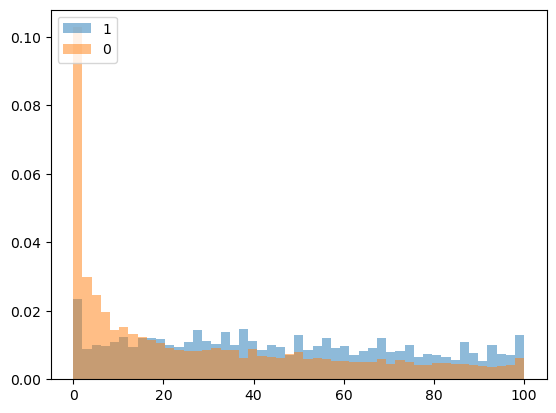

In [21]:
bins = np.linspace(0, 100, 50)
pyplot.hist(df2[df2['is_canceled']==1]['lead_time'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(df2[df2['is_canceled']==0]['lead_time'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper left')

pyplot.show()

#higher lead time means more likely yo be cancelled

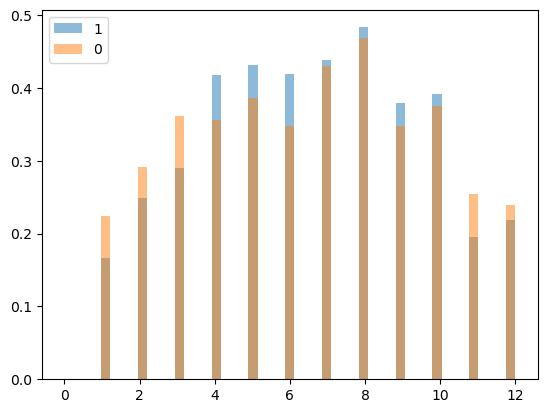

In [7]:
bins = np.linspace(0, 12, 50)
pyplot.hist(df2[df2['is_canceled']==1]['arrival_date_month'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(df2[df2['is_canceled']==0]['arrival_date_month'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper left')

pyplot.show()

#april through october more likely to cancel (summer time?)
#jan through march less likely to cancel
#november december less likely to cancel



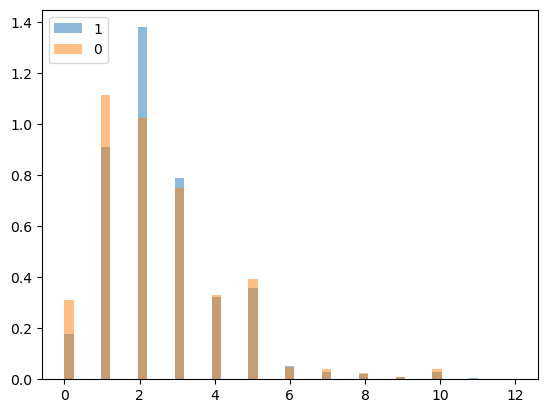

In [9]:
bins = np.linspace(0, 12, 50)
pyplot.hist(df2[df2['is_canceled']==1]['stays_in_week_nights'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(df2[df2['is_canceled']==0]['stays_in_week_nights'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper left')

pyplot.show()

#2 days a week much more likely to cancel


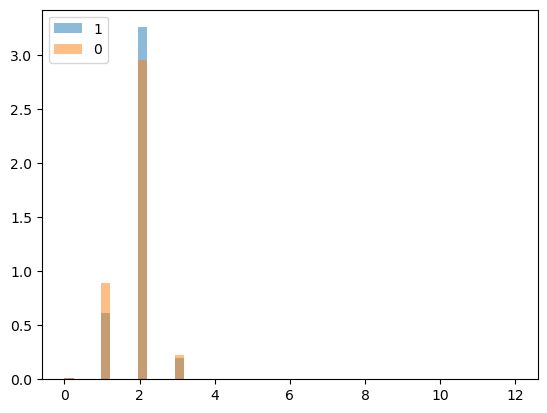

In [10]:
bins = np.linspace(0, 12, 50)
pyplot.hist(df2[df2['is_canceled']==1]['adults'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(df2[df2['is_canceled']==0]['adults'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper left')

#2 adults more likely to cancel
pyplot.show()

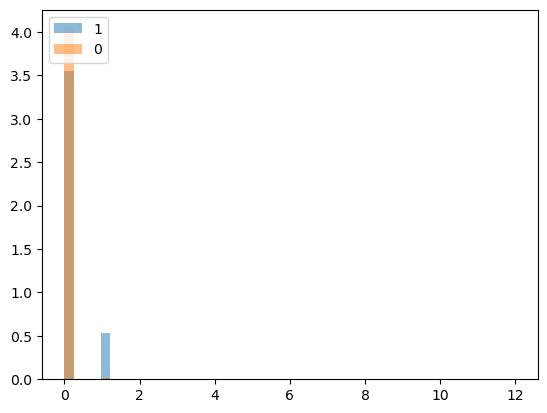

In [14]:

bins = np.linspace(0, 12, 50)
pyplot.hist(df2[df2['is_canceled']==1]['previous_cancellations'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(df2[df2['is_canceled']==0]['previous_cancellations'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper left')

#0 previous cancellations less likely to cancel
#1 cancellation more likely to cancelc

pyplot.show()

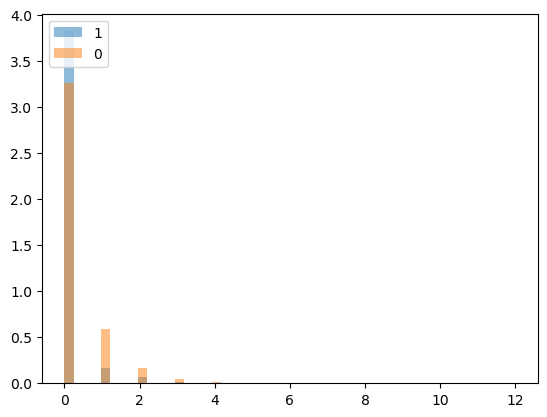

In [16]:

bins = np.linspace(0, 12, 50)
pyplot.hist(df2[df2['is_canceled']==1]['booking_changes'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(df2[df2['is_canceled']==0]['booking_changes'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper left')

#booking changes mean more likely to not cancel
#no booking changes means more likely to cancel

pyplot.show()

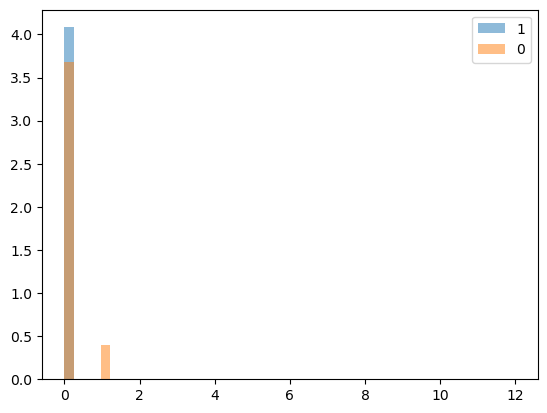

In [18]:

bins = np.linspace(0, 12, 50)
pyplot.hist(df2[df2['is_canceled']==1]['required_car_parking_spaces'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(df2[df2['is_canceled']==0]['required_car_parking_spaces'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper right')

#parking spots means less likely to cancel
pyplot.show()

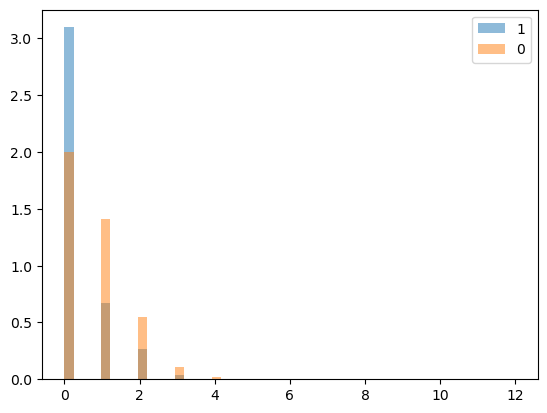

In [19]:


bins = np.linspace(0, 12, 50)
pyplot.hist(df2[df2['is_canceled']==1]['total_of_special_requests'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(df2[df2['is_canceled']==0]['total_of_special_requests'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper right')

#special requests means much more likely to show up
#no special requests means less likely to show up
pyplot.show()

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2[['lead_time', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']], df2['is_canceled'], test_size=0.2)

In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=30, n_jobs=-1)

rf_model = rf.fit(X_train, y_train)



In [27]:
import time
from sklearn.metrics import precision_recall_fscore_support as score


rf = RandomForestClassifier(n_estimators=100, max_depth=30, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test)
end = time.time()
pred_time = (end - start)


precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Fit time: {} / Predict time: {} / Precision: {} / Recall: {} / Accuracy: {}'.format(round(fit_time, 3), round(pred_time, 3),
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 2.092 / Predict time: 0.178 / Precision: 0.781 / Recall: 0.671 / Accuracy: 0.807


In [28]:
import time
from sklearn.metrics import precision_recall_fscore_support as score


rf = GradientBoostingClassifier(n_estimators=100, max_depth=30)

start = time.time()
rf_model = rf.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test)
end = time.time()
pred_time = (end - start)


precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Fit time: {} / Predict time: {} / Precision: {} / Recall: {} / Accuracy: {}'.format(round(fit_time, 3), round(pred_time, 3),
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 274.079 / Predict time: 0.916 / Precision: 0.74 / Recall: 0.689 / Accuracy: 0.794


In [29]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier() # testing random forest classifier with tfidf vectorizer
param = {'n_estimators': [10, 150, 300],
            'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)#grid search must be fit so that it can read in all of the training data. This also performs 5 fold cross-validation

gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values("mean_test_score", ascending=False)[0:5]    #takes results from gs.fit, passes into dataframe, and then sorts models from best results to worst results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,121.939861,4.460715,7.429606,0.689832,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.805727,0.805570,0.805884,0.805036,0.803047,0.805053,0.001043,1
1,48.337483,4.683171,4.069086,1.222562,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.805622,0.805308,0.804732,0.803152,0.802733,0.804310,0.001160,2
5,115.017627,5.838397,8.689541,1.432194,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.801853,0.802848,0.801801,0.800115,0.800429,0.801409,0.001005,3
4,59.655964,7.793839,6.076655,0.269429,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.801591,0.801801,0.803057,0.799696,0.800115,0.801252,0.001216,4
11,103.284591,5.294115,5.785837,0.776071,None,300,"{'max_depth': None, 'n_estimators': 300}",0.801906,0.802586,0.802324,0.800115,0.799173,0.801221,0.001339,5


In [30]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingClassifier()
param = {
    'n_estimators' : [100, 150],
    'max_depth' : [7, 11, 15],
    'learning_rate' : [0.1]
}

gs = GridSearchCV(gb, param, cv=5, n_jobs=-1) #cv is the amount of folds to split the model into for cross-validation
                                                                      #n-jobs is NOT individual models in parralel (cant do that with grad boosting) instead, it is running each different hold out set in parralel

cv_fit = gs.fit(X_train, y_train)
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,137.882163,5.933538,0.363201,0.018457,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.812480,0.807507,0.809444,0.809225,0.804618,0.808655,0.002577,1
5,163.993838,12.078646,0.416755,0.071025,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.811433,0.808345,0.810177,0.805874,0.805193,0.808204,0.002401,2
3,108.280020,10.704885,0.451516,0.041879,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.808502,0.807141,0.808816,0.808963,0.804199,0.807524,0.001783,3
2,119.772741,39.983154,0.314281,0.021074,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.806722,0.801382,0.804785,0.804460,0.801581,0.803786,0.002035,4
1,151.081418,0.271033,0.234503,0.020002,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.787562,0.784839,0.792064,0.790953,0.784933,0.788070,0.002993,5


In [33]:
#best classifiers:
gb = GradientBoostingClassifier(n_estimators=100, max_depth=15)
rf = RandomForestClassifier(n_estimators=300, max_depth=30, n_jobs=-1)


rf_model = rf.fit(X_train.values, y_train.values)




In [34]:
import joblib

joblib.dump(rf_model,'model.pkl')

['model.pkl']